# Dataset
##  Glass Identification Data Set
The dataset consists of different instances of glass segments, each object/instance           containing information on the chemical composition of the segment. Our goals is to group              those instances into groups/clusters of similar instances. There is also a class attribute ( Type              of glass   ) which  must not be used for clustering but can be used for the evaluation of the                  clustering results. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt2
import matplotlib
import scipy
from sklearn import cluster
import numpy as np
import sklearn
from  sklearn import datasets
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.cluster import DBSCAN
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from numpy import genfromtxt
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from pandas.plotting import scatter_matrix
from itertools import cycle
from sklearn.decomposition import PCA
import pylab as pl

from pandas.plotting import scatter_matrix

c:\users\gujabeen\python\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
url= "glass.csv"
names = [ "RI","Na0", "Mg" ,"Al", "Si" ,"K","Ca","Ba","Fe", "class"]
data = pd.read_csv( url ,sep=',',
                  names = names)


In [3]:
#    1. Id number: 1 to 214
#    2. RI: refractive index
#    3. Na: Sodium (unit measurement: weight percent in corresponding oxide, as 
#                   are attributes 4-10)
#    4. Mg: Magnesium
#    5. Al: Aluminum
#    6. Si: Silicon
#    7. K: Potassium
#    8. Ca: Calcium
#    9. Ba: Barium
#   10. Fe: Iron
#   11. Type of glass: (class attribute)
#       -- 1 building_windows_float_processed
#       -- 2 building_windows_non_float_processed
#       -- 3 vehicle_windows_float_processed
#       -- 4 vehicle_windows_non_float_processed (none in this database)
#       -- 5 containers
#       -- 6 tableware
#       -- 7 headlamps
# '''

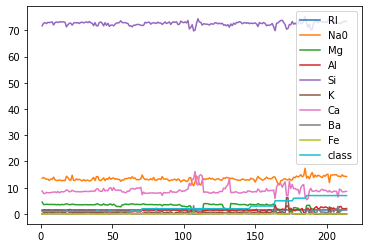

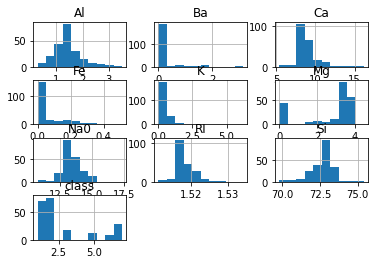

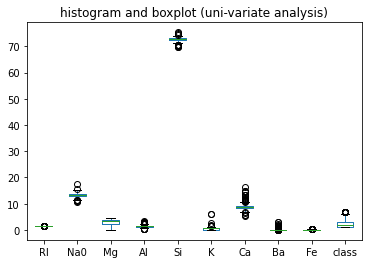

In [4]:
#Plot histogram and boxplot (uni-variate analysis)

data.plot()
data.hist()
data.plot(kind='box')
plt.title("histogram and boxplot (uni-variate analysis)")
plt.show()

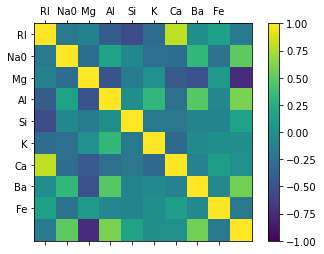

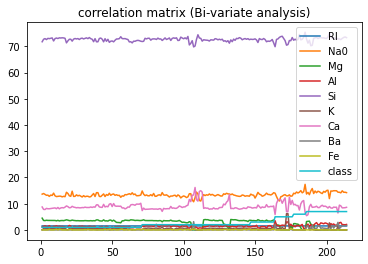

In [5]:
# plot correlation matrix (Bi-variate analysis)
correlations = data.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
data.plot()
plt.title("correlation matrix (Bi-variate analysis)"
)
plt.show()    

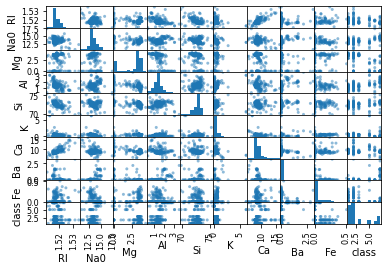

In [6]:
#plot scatterplot matrix (Bi-variate analysis)

scatter_matrix(data)
plt.show()


In [7]:
#Preprocessing/ transformation
# Based on the results thus far, consider
# whether you want to filter out some features ( feature selection ) or
# whether you want to create derived features ( feature transformation ).

print("------------------------Preprocessing/ transformation------------")
# 1. Scale Data

array = data.values
# separate array into input and output components
X = array[:,0:8]
Y = array[:,8]
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(X)
# summarize transformed data
np.set_printoptions(precision=3)
print(rescaledX[0:5,:])

# 2. Standardize Data

scaler2 = MinMaxScaler().fit(X)
rescaledX = scaler2.transform(X)
# summarize transformed data
np.set_printoptions(precision=3)
print(rescaledX[0:5,:])


# 3. Normalize Data

scaler3 = MinMaxScaler().fit(X)
normalizedX = scaler3.transform(X)
# summarize transformed data
np.set_printoptions(precision=3)
print(normalizedX[0:5,:])

#  4. Binarize Data (Make Binary)
'''
binarizer = MinMaxScaler(threshold=0.0).fit(X)
binaryX = binarizer.transform(X)
# summarize transformed data
np.set_printoptions(precision=3)
print(binaryX[0:5,:])
'''

------------------------Preprocessing/ transformation------------
[[0.433 0.438 1.    0.252 0.352 0.01  0.309 0.   ]
 [0.284 0.475 0.802 0.333 0.521 0.077 0.223 0.   ]
 [0.221 0.421 0.791 0.389 0.568 0.063 0.218 0.   ]
 [0.286 0.373 0.822 0.312 0.5   0.092 0.259 0.   ]
 [0.275 0.382 0.806 0.296 0.584 0.089 0.245 0.   ]]
[[0.433 0.438 1.    0.252 0.352 0.01  0.309 0.   ]
 [0.284 0.475 0.802 0.333 0.521 0.077 0.223 0.   ]
 [0.221 0.421 0.791 0.389 0.568 0.063 0.218 0.   ]
 [0.286 0.373 0.822 0.312 0.5   0.092 0.259 0.   ]
 [0.275 0.382 0.806 0.296 0.584 0.089 0.245 0.   ]]
[[0.433 0.438 1.    0.252 0.352 0.01  0.309 0.   ]
 [0.284 0.475 0.802 0.333 0.521 0.077 0.223 0.   ]
 [0.221 0.421 0.791 0.389 0.568 0.063 0.218 0.   ]
 [0.286 0.373 0.822 0.312 0.5   0.092 0.259 0.   ]
 [0.275 0.382 0.806 0.296 0.584 0.089 0.245 0.   ]]


'\nbinarizer = MinMaxScaler(threshold=0.0).fit(X)\nbinaryX = binarizer.transform(X)\n# summarize transformed data\nnp.set_printoptions(precision=3)\nprint(binaryX[0:5,:])\n'

-------------------------Clustering---------------------------
-------------------------ALGORITHM 01: DBSCAN clustering algorithm------------------------
Estimated number of clusters: 3
Homogeneity: 0.500
Completeness: 0.654
V-measure: 0.567
Adjusted Rand Index: 0.500
Adjusted Mutual Information: 0.564
Silhouette Coefficient: 0.418


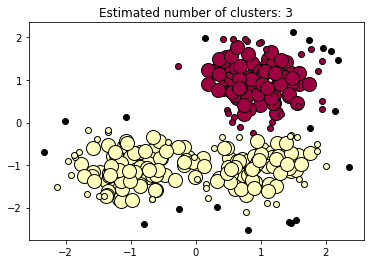

In [8]:
print("-------------------------Clustering---------------------------")

#1. DBScan Clustering algorithm

print("-------------------------ALGORITHM 01: DBSCAN clustering algorithm------------------------")
centers = [[1, 1], [-1, -1], [1, -1]]
data, labels_true = make_blobs(n_samples=300, centers=centers, cluster_std=0.5,
                            random_state=0)
dbsc = DBSCAN(eps = .5, min_samples = 15).fit(data)
labels = dbsc.labels_
core_samples = np.zeros_like(labels, dtype = bool)
core_samples[dbsc.core_sample_indices_] = True

labels = dbsc.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels))

print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(data, labels))



unique_labels = set(labels)
colors = [plt2.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = data[class_member_mask & core_samples]
    plt2.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = data[class_member_mask & ~core_samples]
    plt2.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt2.title('Estimated number of clusters: %d' % n_clusters_)
plt2.show()


-------------------------ALGORITHM 02: Affinity propagation clustering algorithm------------------------
Estimated number of clusters: 3
Homogeneity: 0.872
Completeness: 0.872
V-measure: 0.872
Adjusted Rand Index: 0.912
Adjusted Mutual Information: 0.871
Silhouette Coefficient: 0.753


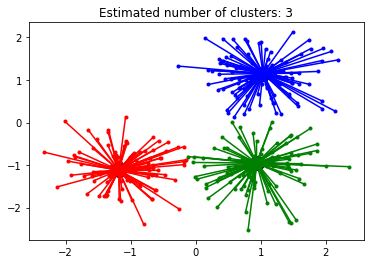

In [9]:

#2. Affinity propagation  Clustering algorithm

print("-------------------------ALGORITHM 02: Affinity propagation clustering algorithm------------------------")


data, labels_true = make_blobs(n_samples=300, centers=centers, cluster_std=0.5,
                            random_state=0)

af = AffinityPropagation(preference=-50).fit(data)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

n_clusters_ = len(cluster_centers_indices)

print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(data, labels, metric='sqeuclidean'))
plt.close('all')
plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = data[cluster_centers_indices[k]]
    plt.plot(data[class_members, 0], data[class_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
    for x in data[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()


-------------------------ALGORITHM 03: K-means clustering algorithm------------------
Centroids:
[[-1.07  -1.045]
 [ 1.002  1.064]
 [ 0.96  -1.078]]
Estimated number of clusters: 3
Homogeneity: 0.862
Completeness: 0.862
V-measure: 0.862
Adjusted Rand Index: 0.903
Adjusted Mutual Information: 0.861
Silhouette Coefficient: 0.560


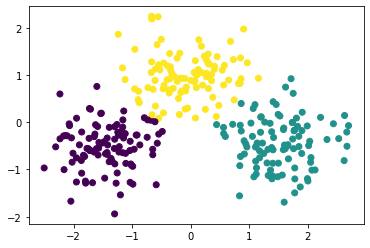

In [10]:

#3. K-means Clustering algorithm

print("-------------------------ALGORITHM 03: K-means clustering algorithm------------------")


centers = [[1, 1], [-1, -1], [1, -1]]
data, labels_true = make_blobs(n_samples=300, centers=centers, cluster_std=0.5,
                            random_state=0)
k_means = cluster.KMeans(n_clusters=3, max_iter=1000)
k_means.fit(data)
centroids=k_means.cluster_centers_
labels=k_means.labels_

n_cluster=len(set(labels))

print("Centroids:")
print(centroids)
print('Estimated number of clusters: %d' % n_cluster)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(data, labels))

pca = PCA(n_components=2).fit(data)
pca_2d = pca.transform(data)


pl.figure('K-means with 3 clusters')
pl.scatter(pca_2d[:, 0], pca_2d[:, 1], c=k_means.labels_)
pl.show()